In [34]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
## Load dataset
# Make sure you are in the main folder('..\Algal-bloom-prediction-machine-learning')
cd = os.getcwd()
if cd.split('\\')[-1]!='Algal-bloom-prediction-machine-learning':
    os.chdir('..')
    cd=os.getcwd()
    
os.chdir('Trainning data')

In [36]:
lakename = input('Lake name in short:')
winter = input('Winter data or not? (Y/N)')
if winter =='Y':
    all_df = pd.read_csv(lakename+'_Observation_df.csv',sep = '\t',parse_dates = ['Date'])
else:
    all_df = pd.read_csv(lakename+'_Observation_df_nowinter.csv',sep = '\t',parse_dates = ['Date'])

Lake name in short:ME
Winter data or not? (Y/N)N


In [66]:
all_df=all_df.drop_duplicates(subset=['Date'])

Index(['Date', 'O2', 'CAR_dic', 'Si', 'N_Nit', 'PO4', 'N_Amm', 'Chl', 'SST',
       'delT', 'U', 'AirT', 'Prec', 'swr', 'MLD', 'doy', 'month', 'W', 'Ice_d',
       'days_from_iceoff', 'inflow', 'outflow', 'MM', 'YY'],
      dtype='object')
Number of variables: 1
The variable to visualize: Chl
Y label:$μg/L$


(12843.0, 16436.0)

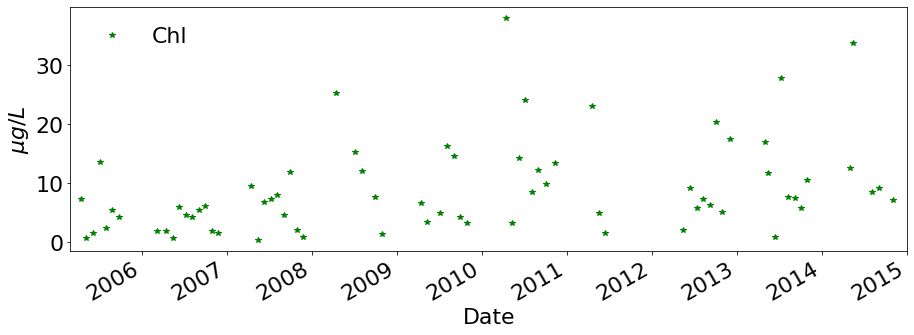

In [76]:
print(all_df.columns)
n_var=int(input('Number of variables: '))
variable=[]
for i in range(n_var):
    v=input('The variable to visualize: ')
    variable.append(v)
    
fig,ax=plt.subplots(figsize=(15,5))
plt.rcParams.update({'font.size': 22})
all_df.plot(x = 'Date',y = variable,style=['g*'],ax=ax)
ax.legend(frameon=False)
ax.set_xlabel('Date')
ax.set_ylabel(input('Y label:'))
ax.set_xlim(pd.Timestamp(2005,3,1),pd.Timestamp(2015,1,1))

C:\Users\shuli278\AppData\Local\Temp/ipykernel_3360/837320195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['YY']=all_df['Date'].apply(lambda d:d.year)


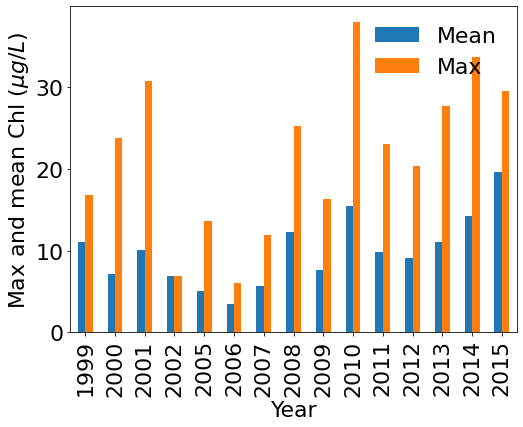

In [78]:
all_df['YY']=all_df['Date'].apply(lambda d:d.year)
f,ax=plt.subplots(figsize=(8,6))
Nut=pd.concat([all_df.groupby('YY').mean()[v],all_df.groupby('YY').max()[v]],axis=1)
Nut.columns=['Mean','Max']
Nut.plot(kind='bar',ylabel=('Max and mean Chl ($μg/L$)'),xlabel=('Year'),ax=ax)
ax.legend(frameon=False)